# Analysis of 2021 olimpic

The main **goal** of this analysis is to see if the data is **complete**, make some **data visualizations**, see how much athletes started at the new dysypline which is **skateboarding**

## 1. Importing modules and examine the data

In [ ]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Verdana']
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('Athletes.xlsx')

In [ ]:
df.describe()

,Name,NOC,Discipline
count,11085,11085,11085
unique,11062,206,46
top,van ROUWENDAAL Sharon,United States of America,Athletics
freq,2,615,2068


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11085 entries, 0 to 11084
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        11085 non-null  object
 1   NOC         11085 non-null  object
 2   Discipline  11085 non-null  object
dtypes: object(3)
memory usage: 259.9+ KB


In [ ]:
df.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [ ]:
df.tail()

,Name,NOC,Discipline
11080,ZWICKER Martin Detlef,Germany,Hockey
11081,ZWOLINSKA Klaudia,Poland,Canoe Slalom
11082,ZYKOVA Yulia,ROC,Shooting
11083,ZYUZINA Ekaterina,ROC,Sailing
11084,ZYZANSKA Sylwia,Poland,Archery


In [ ]:
df.isnull().sum()

Name          0
NOC           0
Discipline    0
dtype: int64

We can see that there's **no null** values

In [ ]:
df[df.duplicated()]

,Name,NOC,Discipline
254,ALI Mohamed,Bahrain,Handball


In [ ]:
df[df.Name == 'ALI Mohamed']

,Name,NOC,Discipline
253,ALI Mohamed,Bahrain,Handball
254,ALI Mohamed,Bahrain,Handball


This players are **not duplicated**, after research i found out that they different people, just have the same name and playing in the same discipline, for the same country. 

Player 1: https://olympics.com/tokyo-2020/olympic-games/en/results/handball/athlete-profile-n1301212-ali-mohamed.htm


Player 2: https://olympics.com/tokyo-2020/olympic-games/en/results/handball/athlete-profile-n1301080-ali-mohamed.htm

I'm going to change the names of the columns to more readable

In [ ]:
df.columns = ['name', 'nacionality', 'discipline']

## 2.Data visualizations

Make new table - group the athletes amount by their nacionality

In [ ]:
most_frequent_nationalities = df.groupby('nacionality').count().sort_values(by = 'discipline', ascending=False).head()['discipline']

Making plot

<ipython-input-20-239d22de7f5b>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['USA', 'Japan', 'Australia','China', 'Germany'],fontsize = 16, weight= 'bold') #  setting the ticks
<ipython-input-20-239d22de7f5b>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['', '200', '', '400', '', '600'], fontsize = 16, weight = 'bold')


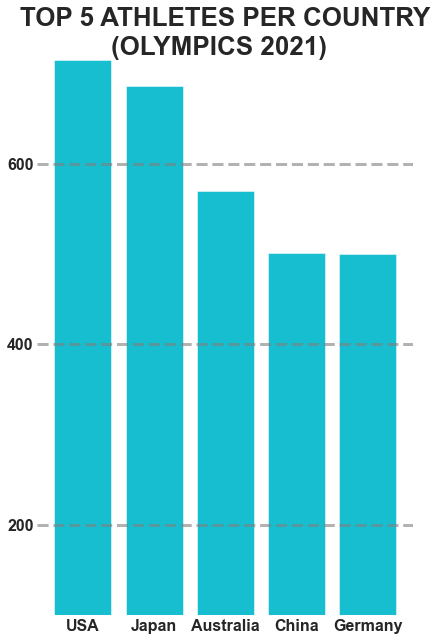

In [ ]:
plt.style.use("fivethirtyeight")
sns.set_style(style ='white') #  setting style

fig, ax= plt.subplots()  #  making a fig object and ax object


fig.set_figheight(10) #  setting the figure object
fig.set_figwidth(6)

ax.bar(most_frequent_nationalities.index, most_frequent_nationalities.values, color = '#17becf') #  making a bar plot

ax.set_title("TOP 5 ATHLETES PER COUNTRY", weight = "bold", fontsize = 26)   #  setting the tittle of the plot
ax.text(0.4,620,'(OLYMPICS 2021)', fontsize = 26, weight = 'bold')  #  adding some text below tittle
ax.set_xticklabels(['USA', 'Japan', 'Australia','China', 'Germany'],fontsize = 16, weight= 'bold') #  setting the ticks
ax.set_yticklabels(['', '200', '', '400', '', '600'], fontsize = 16, weight = 'bold')

spines = ['right', 'left', 'bottom', 'top'] #  setting spines
for spine in spines:
    ax.spines[spine].set_visible(False)
    
ax.axline((0,100), (3,100), linewidth = 3, alpha = 0.6, color = 'grey', linestyle='--') #  setting spines
ax.axline((0,300), (3,300), linewidth = 3, alpha = 0.6, color = 'grey', linestyle='--')
ax.axline((0,500), (3,500), linewidth = 3, alpha = 0.6, color = 'grey', linestyle='--')

plt.show()

Now i'm going to **group the athlete amount per discipline** and see which one was the most frequent on olimpics in Tokyo

In [ ]:
most_frequent_disciplines = df.groupby('discipline').count().sort_values(by = 'name', ascending=False)['name'].head().sort_values(ascending=True)

Making plot

<ipython-input-21-eb940abd0b27>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['HOCKEY','ROWING', 'FOOTBALL', 'SWIMMING', 'ATHLETICS'],fontsize = 16, weight= 'bold') #  setting the ticks
<ipython-input-21-eb940abd0b27>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['', '500', '1000', '', '2000'], fontsize = 16, weight = 'bold')


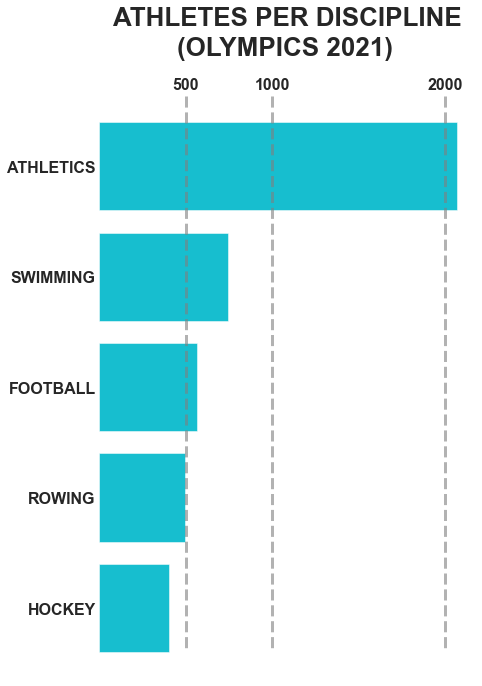

In [ ]:
plt.style.use("fivethirtyeight")
sns.set_style(style ='white') #  setting style

fig, ax= plt.subplots()  #  making a fig object and ax object


fig.set_figheight(10) #  setting the figure object
fig.set_figwidth(6)
ax.xaxis.tick_top()
ax.barh(most_frequent_disciplines.index, most_frequent_disciplines.values, color = '#17becf') #  making a bar plot

spines = ['right', 'left', 'bottom', 'top'] #  setting spines
for spine in spines:
    ax.spines[spine].set_visible(False)

ax.set_title("ATHLETES PER DISCIPLINE", weight = "bold", fontsize = 26, pad = 70)   #  setting the tittle of the plot
ax.text(450,5,'(OLYMPICS 2021)', fontsize = 26, weight = 'bold')  #  adding some text below tittle
ax.set_yticklabels(['HOCKEY','ROWING', 'FOOTBALL', 'SWIMMING', 'ATHLETICS'],fontsize = 16, weight= 'bold') #  setting the ticks
ax.xaxis.tick_top() #  setting x-tick on the top
ax.set_xticklabels(['', '500', '1000', '', '2000'], fontsize = 16, weight = 'bold')


ax.axvline(x = 1000, ymin=1, ymax=0.05,linewidth = 3, alpha = 0.6, color = 'grey', linestyle='--') #  setting vertical lines
ax.axvline(x = 2000, ymin=1, ymax=0.05,linewidth = 3, alpha = 0.6, color = 'grey', linestyle='--')
ax.axvline(x = 500, ymin=1, ymax=0.05,linewidth = 3, alpha = 0.6, color = 'grey', linestyle='--')

plt.show()

The last thing is to see how many athletes started at skateboarding

In [ ]:
skateboarding = df[df['discipline'] == 'Skateboarding'].count()['name']

disciplines_frequency = df.groupby('discipline').count().sort_values(by = 'name', ascending=False)['name']
mean = round(disciplines_frequenty.mean())

print(f'skateboarding:> {skateboarding} \nmean:> {mean}')

skateboarding:> 77 
mean:> 241


## 3. Conclusions

We can see that the country with the biggest amount of athletes is USA, the most athletes started in athletics - https://en.wikipedia.org/wiki/Category:Summer_Olympic_disciplines_in_athletics, we can see that it have wide meaning. Anyway, we see that skateboarding had occured 77 times and it's way less than the mean which is 241.